In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import minimize

In [17]:
dt = 0.01  # for odeint


In [18]:
def seir_eq(v, t, beta, lp, ip):
    S, E, I, R = v
    dSdt = -beta * S * I
    dEdt = beta * S * I - E / lp
    dIdt = E / lp - I / ip
    dRdt = I / ip
    return dSdt, dEdt, dIdt, dRdt

In [19]:
def estimate_seir(seir_eq, init_state, t, beta, lp, ip, num_t, step_t):
    sol = odeint(seir_eq, init_state, t, args=(beta, lp, ip))
    est = sol[0:num_t:step_t]
    return est

In [28]:
init_S = 2000000
init_E = 0
init_I = 100
init_R = 0
init_state = [init_S, init_E, init_I, init_R]

beta = 0.02
lp = 1.0
ip = 2.0

t_max = 14
t = np.arange(0, t_max, dt)
num_t = int(t_max/dt)
step_t = int(1/dt)

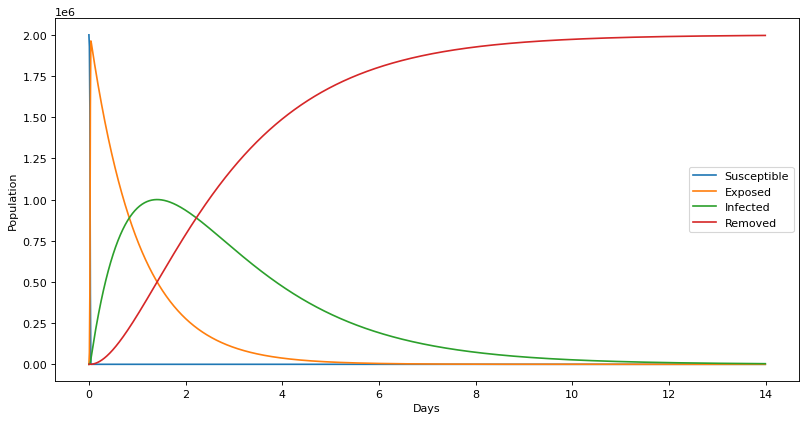

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
sol = odeint(seir_eq, init_state, t, args=(beta, lp, ip))
plt.plot(t, sol)
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend(['Susceptible', 'Exposed', 'Infected', 'Removed'])
plt.show()